# Importing Dependicies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import warnings
import warnings
warnings.filterwarnings("ignore")
#Set Figure size
plt.rcParams["figure.figsize"] = (10, 6)

# Loading Data.....

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,review_id,review_text,label
0,57,I have been a Maximum PC reader since its begi...,5
1,97,"If you into gaming, into the latest PC tech in...",5
2,147,This is a great magazine.... Subscribed for m...,4
3,148,sucks (period),1
4,151,too many ads the whole magazine is ads. I cant...,2


## EDA Exploraty Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    12652 non-null  int64 
 1   review_text  12652 non-null  object
 2   label        12652 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 296.7+ KB


#### 1. No Null Values in training data.
#### 2. Total of 12652 samples are there.

In [5]:
# Checking % Unique values in review_id 
len(np.unique(df.review_id))/len(df.review_id)*100

100.0

#### All the values in review_id are unique

<AxesSubplot:xlabel='label', ylabel='review_id'>

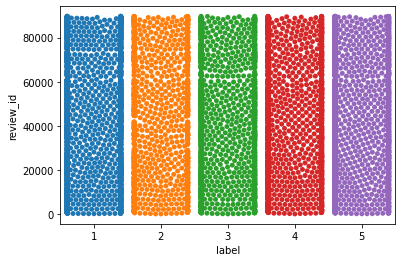

In [6]:
# Checking the variation on labels with review_id
sns.swarmplot(data=df,x='label',y='review_id')

#### we didnt see any relation between label and review_id
#### We can drop of review_id

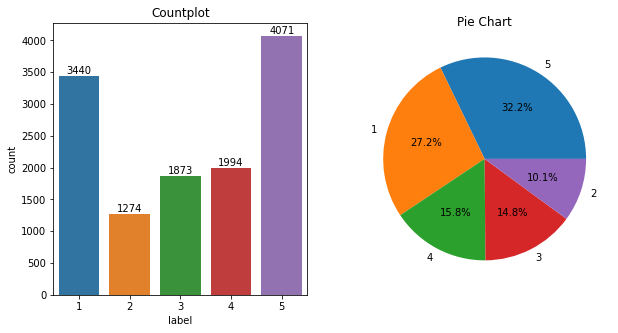

In [7]:
# Exploring labels
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Create a countplot of the 'lebel' variable
sns.countplot(x="label", data=df, ax=ax1)
ax1.set_title("Countplot")
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

# Create a pie chart of the 'label' variable
sizes = df["label"].value_counts()
ax2.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
ax2.set_title("Pie Chart")

# Show the plot
plt.show()

###### The label-5 category has the highest representation in the data, accounting for 32.2% of the text samples, while the label-2 category has the lowest representation at 10.1%.

# Creating and Exploring various models

### Import dependencies for model building

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Split the data into training and Testing

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df['label'], test_size=0.2, random_state=42)

### Vectorize the data 

In [10]:
# Create the vectorizer and fit on the training data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

### Building the model and checking the Accuracy

In [11]:
# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6301856973528249


#### Trying Linear SVC

In [12]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Create a vectorizer to convert text to feature vectors
vectorizer = TfidfVectorizer()

# Convert the training and testing text to feature vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a LinearSVC classifier
clf = LinearSVC()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

# Print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6653496641643619


#### Trying SVC

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier
clf = SVC(kernel='linear', C=1, gamma='auto')
clf.fit(X_train_vec, y_train)

# Predict the test set labels and calculate accuracy
y_pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.6973528249703674


#### Optimizing SVC with GridSearchCV

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set up a pipeline for vectorization and classification
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(pen))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.1, 1, 'scale', 'auto']
}

# Train the model with GridSearchCV
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its score
best_clf = grid_search.best_estimator_
print(f"Best estimator: {best_clf}")
print(f"Training score: {best_clf.score(X_train, y_train)}")
print(f"Test score: {best_clf.score(X_test, y_test)}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best estimator: Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', SVC(C=1, gamma=1))])
Training score: 0.9118664163620196
Test score: 0.6677202686685104


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Set up a pipeline for vectorization and classification
text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', SVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'vect__max_features': [1000, 5000, 10000],
    'vect__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.1, 1, 'scale', 'auto']
}

# Train the model with GridSearchCV
grid_search = GridSearchCV(text_clf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator and its score
best_clf = grid_search.best_estimator_
print(f"Best estimator: {best_clf}")
print(f"Training score: {best_clf.score(X_train, y_train)}")
print(f"Test score: {best_clf.score(X_test, y_test)}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best estimator: Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', SVC(C=1, gamma=1))])
Training score: 0.9152257682047229
Test score: 0.6677202686685104


#### Trying Randomforest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6760173844330304


#### Trying MultinominalNB by removing stopwords

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

# Download the stop words list from nltk
import nltk
nltk.download('stopwords')

# Get the stop words list
stop_words = set(stopwords.words('english'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df['label'], test_size=0.2, random_state=42)

# Create the vectorizer and fit on the training data
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[nltk_data] Downloading package stopwords to C:\Users\VIKAS
[nltk_data]     REDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.6203081785855393


#### SVC by removing stopwords

In [29]:
# Create the vectorizer and fit on the training data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_vec = vectorizer.transform(X_test)

# Train an SVM classifier
clf = SVC()
clf.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6677202686685104


#### Trying with XGB classifier

In [30]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test_vec)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

[22:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6538917423943106
